In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from tqdm import tqdm




In [20]:
df = pd.read_csv('N_gram.csv')

In [21]:
df.head()

,Unnamed: 0,ماشین,لباسشویی,دوقلوی,کودک,سازنده,برند,قدیمی,ناسیونال,یک,...,فرمون,دوخته,فرزانگان,cat1,cat2,cat3,price,size,year,room_number
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,home-kitchen,appliance,washing-machines,1850000.0,0,0,0
1,1,0,3,0,0,0,0,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,8000000.0,0,0,0
2,2,3,2,0,0,0,0,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,5500000.0,0,0,0
3,3,1,2,0,0,0,0,0,0,1,...,0,0,0,home-kitchen,appliance,washing-machines,500000.0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,12000000.0,0,0,0


# pca

In [22]:
data=df.drop(columns=['Unnamed: 0','cat1','cat2',"cat3","price"])

In [23]:
#df['price'] = df['price'].astype(int)
df['year'] = df['year'].astype(int)
df['size'] = df['size'].astype(int)
df['room_number'] = df['room_number'].astype(int)

In [24]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


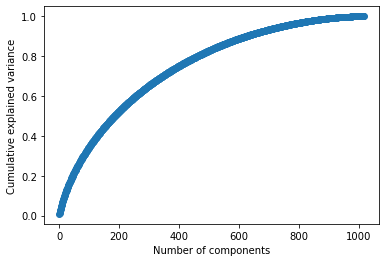

In [25]:

# Perform PCA with different number of components
pca = PCA()
pca.fit(scaled_data)
explained_variances = pca.explained_variance_ratio_
cumulative_variances = explained_variances.cumsum()

# Plot the cumulative explained variance vs number of components
fig, ax = plt.subplots()
ax.plot(range(1, len(cumulative_variances)+1), cumulative_variances, marker='o')
ax.set_xlabel('Number of components')
ax.set_ylabel('Cumulative explained variance')
plt.show()

In [26]:

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform PCA with n_components set to 450
pca = PCA(n_components=450)
principalComponents = pca.fit_transform(scaled_data)

# Create a new dataframe for the principal components
col_names = ['PC{}'.format(i) for i in range(1, 451)]
principalDf = pd.DataFrame(data = principalComponents, columns = col_names)

# Concatenate the principal components with the original dataset
resultDf = pd.concat([principalDf, data], axis = 1)


In [30]:
extracted_col  = df[['cat1','cat2','cat3','price']]
principalDf = principalDf.join(extracted_col)
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC445,PC446,PC447,PC448,PC449,PC450,cat1,cat2,cat3,price
0,-0.552651,-1.346140,-0.618155,-1.442235,-0.514489,-1.015334,-0.770889,-1.320292,-1.863510,1.037238,...,-0.010915,-0.798505,0.011183,0.681494,-2.229014,-0.628250,home-kitchen,appliance,washing-machines,1850000.0
1,-0.098234,-1.442715,-0.463818,-2.151383,-0.703172,-2.900318,-0.444658,0.523140,-1.413534,0.403305,...,-0.137957,-0.220062,-0.784973,0.155488,-0.140989,-0.194560,home-kitchen,appliance,washing-machines,8000000.0
2,-0.593803,-1.174541,-0.675014,-1.320337,-0.412037,-2.192245,-1.052772,-0.947903,-1.559558,0.699696,...,1.461791,0.325013,0.247009,0.793837,1.116944,-0.334837,home-kitchen,appliance,washing-machines,5500000.0
3,0.360490,-1.251186,-0.689779,-1.440466,-0.510641,-1.701228,-0.623879,-0.836963,-1.111491,0.486731,...,0.172531,0.662714,-0.068943,-0.368557,0.169158,0.279577,home-kitchen,appliance,washing-machines,500000.0
4,-0.563537,-1.054426,-0.710527,-1.534021,-0.583507,-1.765710,-0.885005,-1.602090,-1.514373,0.722861,...,0.577337,-0.769260,0.038550,0.330559,0.535277,-0.182207,home-kitchen,appliance,washing-machines,12000000.0


In [32]:
principalDf.to_csv("pca_with_N_450.csv")

In [33]:

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform PCA with n_components set to 20
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(scaled_data)

# Create a new dataframe for the principal components
col_names = ['PC{}'.format(i) for i in range(1, 21)]
principalDf = pd.DataFrame(data = principalComponents, columns = col_names)

# Concatenate the principal components with the original dataset
resultDf = pd.concat([principalDf, data], axis = 1)


In [34]:
extracted_col  = df[['cat1','cat2','cat3','price']]
principalDf = principalDf.join(extracted_col)
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,cat1,cat2,cat3,price
0,-0.554628,-1.341665,-0.621083,-1.437653,-0.519004,-1.015800,-0.761576,-1.316976,-1.852481,1.022804,...,-0.408245,0.060088,-1.088320,-0.020668,0.457587,0.561175,home-kitchen,appliance,washing-machines,1850000.0
1,-0.101400,-1.438714,-0.475995,-2.132359,-0.702516,-2.905588,-0.424555,0.518959,-1.336613,0.418700,...,-2.531984,0.805674,-0.869815,-0.407120,0.599322,1.188814,home-kitchen,appliance,washing-machines,8000000.0
2,-0.596246,-1.167504,-0.678384,-1.307887,-0.421065,-2.212274,-1.020822,-0.924433,-1.542712,0.715310,...,-1.071573,0.217495,-1.516901,-0.110922,0.248283,0.532067,home-kitchen,appliance,washing-machines,5500000.0
3,0.360469,-1.252713,-0.696435,-1.434443,-0.514773,-1.717206,-0.604018,-0.828415,-1.086361,0.466108,...,-0.472700,0.194894,-0.983468,0.034762,0.224134,0.653247,home-kitchen,appliance,washing-machines,500000.0
4,-0.565137,-1.053135,-0.713790,-1.518120,-0.589871,-1.765374,-0.870383,-1.590347,-1.470546,0.729775,...,-0.679360,-0.161177,-1.290274,-0.168679,0.426136,0.447036,home-kitchen,appliance,washing-machines,12000000.0


In [35]:
principalDf.to_csv("pca_with_N_20.csv")

# TSVD

In [36]:
tsvd = TruncatedSVD(n_components=20)
principalComponents = tsvd.fit_transform(scaled_data)

# Create a new dataframe for the principal components
col_names = ['PC{}'.format(i) for i in range(1, 21)]
principalDf = pd.DataFrame(data = principalComponents, columns = col_names)

# Concatenate the principal components with the original dataset
resultDf = pd.concat([principalDf, data], axis = 1)

In [39]:
extracted_col  = df[['cat1','cat2','cat3','price']]
principalDf = principalDf.join(extracted_col)
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,cat1,cat2,cat3,price
0,-0.562102,-1.291654,-0.602774,-1.475352,-0.490508,-1.050009,-0.696896,-1.025957,-1.830463,0.870954,...,0.240529,-0.138744,-1.428514,0.882903,0.917058,-0.049261,home-kitchen,appliance,washing-machines,1850000.0
1,-0.110192,-1.429052,-0.456609,-2.249424,-0.669112,-3.018359,-0.335207,0.967758,-1.287720,0.114884,...,1.739113,0.599422,-2.007051,1.462477,1.287532,0.978413,home-kitchen,appliance,washing-machines,8000000.0
2,-0.602808,-1.092853,-0.661182,-1.342027,-0.398307,-2.189384,-0.963030,-0.717265,-1.447892,0.479211,...,0.494581,0.343295,-1.710146,0.496946,0.671853,-0.250566,home-kitchen,appliance,washing-machines,5500000.0
3,0.353789,-1.220865,-0.662264,-1.470039,-0.497410,-1.729522,-0.526726,-0.623293,-1.054366,0.370572,...,0.261128,0.393246,-1.235319,0.475452,0.833287,-0.009099,home-kitchen,appliance,washing-machines,500000.0
4,-0.581326,-1.005193,-0.693042,-1.583610,-0.579712,-1.786026,-0.801667,-1.379345,-1.522006,0.557926,...,0.390902,-0.229086,-1.682055,0.840897,0.503858,-0.424381,home-kitchen,appliance,washing-machines,12000000.0


In [40]:
principalDf.to_csv("tsvd_with_N_20.csv")

# Human

In [60]:
import pandas as pd
from __future__ import unicode_literals
from hazm import *
from collections import Counter
from tqdm import tqdm

In [41]:
df = pd.read_csv('normalize_divar_dataset.csv')

In [43]:
df["description"] = df['description'].fillna('توضیحات ندارد')
df["sub_title"] = df['sub_title'].fillna('توضیحات ندارد')
df.head()

,Unnamed: 0,Unnamed: 0.1,index,cat1,cat2,cat3,title,description,url,sub_title,price,size,year,room_number
0,0,0,0,home-kitchen,appliance,washing-machines,ماشین لباسشویی دوقلوی کودک,سازنده برند قدیمی ناسیونال,https://divar.ir/v/ماشین-لباسشویی-دوقلوی-کودک_...,یک ربع پیش در تهران، جوانمرد قصاب,1850000.0,0,0,0
1,1,1,1,home-kitchen,appliance,washing-machines,لباسشویی بست BOST,لباسشویی کاملا سالم خدارو شکر مشکلی نداره از ه...,https://divar.ir/v/لباسشویی-بست-bost_ماشین-لبا...,نیم ساعت پیش در تهران، آذربایجان,8000000.0,0,0,0
2,2,2,2,home-kitchen,appliance,washing-machines,ماشین لباسشویی سامسونگ,ماشین لباسشویی سامسونگ کره‌ای اصلی سالم تمیز ب...,https://divar.ir/v/ماشین-لباسشویی-سامسونگ_ماشی...,نیم ساعت پیش در تهران، ابن بابویه,5500000.0,0,0,0
3,3,3,3,home-kitchen,appliance,washing-machines,موتور لباسشویی هایر,یک عدد موتور لباسشویی برای همه ماشین لباسشویی‌...,https://divar.ir/v/موتور-لباسشویی-هایر_ماشین-ل...,۱ ساعت پیش در تهران، جنت‌آباد جنوبی,500000.0,0,0,0
4,4,4,4,home-kitchen,appliance,washing-machines,لباسشوئی سامسونگ,ساعات پاسخگویی ۲۰۹ توجه: قیمت کالا مقطوع است و...,https://divar.ir/v/لباسشوئی-سامسونگ_ماشین-لباس...,۱ ساعت پیش در تهران، جنت‌آباد شمالی,12000000.0,0,0,0


In [54]:

#### split to words
split_it=[]
signs = [",", ".", "?", ";", ":", "(", ")", "$", "%", "!", "\'", "\"", "{", "}", "[", "]", "&", 
           "،", "؛", "«", "»", "؟", "!", " ", "‌","?","@","1"]
for i in range(len(df)):
    
    a = word_tokenize(df.iat[i,6])
    b = word_tokenize(df.iat[i,7])
    c = word_tokenize(df.iat[i,9])
    
    for j in a:   
        if j in signs :
            continue
        else:
            split_it.append(j)
    for j in b:   
        if j in signs :
            continue
        else:
            split_it.append(j)
            
    for j in c:   
        if j in signs :
            continue
        else:
            split_it.append(j)            

In [76]:
from collections import Counter
Counter = Counter(split_it)
most_occur = Counter.most_common()
most_occur[1][1]


1769

 Deleting columns whose words are repeated too little or too much

In [100]:
df = pd.read_csv('N_gram.csv')
df.head()

,Unnamed: 0,ماشین,لباسشویی,دوقلوی,کودک,سازنده,برند,قدیمی,ناسیونال,یک,...,فرمون,دوخته,فرزانگان,cat1,cat2,cat3,price,size,year,room_number
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,home-kitchen,appliance,washing-machines,1850000.0,0,0,0
1,1,0,3,0,0,0,0,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,8000000.0,0,0,0
2,2,3,2,0,0,0,0,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,5500000.0,0,0,0
3,3,1,2,0,0,0,0,0,0,1,...,0,0,0,home-kitchen,appliance,washing-machines,500000.0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,12000000.0,0,0,0


In [105]:
Number = 0
for i in tqdm(range(len(most_occur))) : 
    if most_occur[i][1] > 200 or most_occur[i][1] < 20:
        try:
            df = df.drop(columns = most_occur[i][0])
            Number += 1
        except :
            continue 

100%|██████████| 7300/7300 [05:20<00:00, 22.75it/s] 


In [106]:
df.head()

,Unnamed: 0,کودک,سازنده,برند,تهران,کاملا,سالم,هیچ,نظر,فقط,...,گلگیر,بنزینی,پراید,cat1,cat2,cat3,price,size,year,room_number
0,0,1,1,1,1,0,0,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,1850000.0,0,0,0
1,1,0,0,0,1,1,1,2,1,1,...,0,0,0,home-kitchen,appliance,washing-machines,8000000.0,0,0,0
2,2,0,0,0,1,0,1,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,5500000.0,0,0,0
3,3,0,0,0,1,1,1,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,500000.0,0,0,0
4,4,0,0,0,1,0,0,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,12000000.0,0,0,0


In [107]:
df.to_csv("Human_Feature_Eng.csv")